# Plots

This notebook contains code necessary to generate most of the plots for the Pan 3D Genome project. I have organized this largely by order of appearance in the manuscript; however, a few sections may be out of order. Use the Table of Contents below to navigate to specific plot.

## Table of Contents

- [Load Packages and Main Dataframe](#loaddataframe)
- [N Variants per Individual](#nvariantsperindividual)
- [Divergence Distribution](#divergencedistribution)
- [Example IDW Distribution](#exampleIDWdistribution)
- [Individually Driven Windows Sequence Divergence](#idwsequencedivergence)
- [Global 3D vs Sequence Divergence](#global3dvssequencedivergence)
- [Local 3D vs Sequence Divergence](#local3dvssequencedivergence)
- [Gene Expression](#geneepxression)

## Load Packages and Main Dataframe <a class = 'anchor' id = 'loaddataframe'></a>

Load all needed packages, change directories, set font, and load the main dataframe that we previously generated.

In [1]:
library(cowplot)
library(ComplexUpset)
library(ggExtra)
library(ggplot2)
library(ggpubr)
library(reshape2)
library(showtext)
library(stringr)
options(scipen=999)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend


Loading required package: sysfonts

Loading required package: showtextdb



In [2]:
setwd('../../figures')

In [3]:
font_add('Arial', '~/fonts/arial.ttf')
showtext_auto()
showtext_opts(dpi = 300)

Colors.

In [4]:
ppn_pt_color = '#8c510a'
pt_pt_color = '#bf812d'
ppn_color = '#829a2d'
pte_color = '#d77d85'
pts_color = '#cfaf53'
ptt_color = '#d29063'
ptv_color = '#c38dad'
#pte_color = '#d2989d'

In [5]:
comparisons = read.csv('../data/dataframes/HFF_comparisons.txt', sep = '\t', header = TRUE)
head(comparisons)

,ind1,ind2,dyad_type,chr,window_start,window,mse,spearman,divergence,seq_diff
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,Akwaya-Jean,Alfred,pte-ptt,chr10,1572864,chr10_1572864,0.0001679965,0.9876550,0.012344984,2803
2,Akwaya-Jean,Alfred,pte-ptt,chr10,2097152,chr10_2097152,0.0004808925,0.9698092,0.030190797,2715
3,Akwaya-Jean,Alfred,pte-ptt,chr10,2621440,chr10_2621440,0.0016745600,0.9963985,0.003601548,2849
4,Akwaya-Jean,Alfred,pte-ptt,chr10,3145728,chr10_3145728,0.0003225794,0.9978993,0.002100716,2606
5,Akwaya-Jean,Alfred,pte-ptt,chr10,3670016,chr10_3670016,0.0001429828,0.9967316,0.003268396,2594
6,Akwaya-Jean,Alfred,pte-ptt,chr10,4194304,chr10_4194304,0.0022898065,0.9975879,0.002412069,2885


In [6]:
nrow(comparisons)

[1] 6669390

## N Variants per Individual <a class = 'anchor' id = 'nvariantsperindividual'></a>

In [7]:
n_variants = read.csv('../data/metadata/n_variants.txt', sep = '\t', header = FALSE)
colnames(n_variants) <- c('id','lineage','n_variants')
n_variants$lineage <- factor(n_variants$lineage , levels = c('ppn', 'ptt', 'pts', 'pte', 'ptv'))
n_variants <- n_variants[order(n_variants$lineage, -n_variants$n_variants),]
n_variants$id <- factor(n_variants$id, levels = n_variants$id)
head(n_variants)

,id,lineage,n_variants
,<fct>,<fct>,<int>
44,Kumbuka,ppn,9393495
40,Kombote,ppn,9214395
12,Bono,ppn,9198721
26,Desmond,ppn,9181795
28,Dzeeta,ppn,9166793
33,Hortense,ppn,9164493


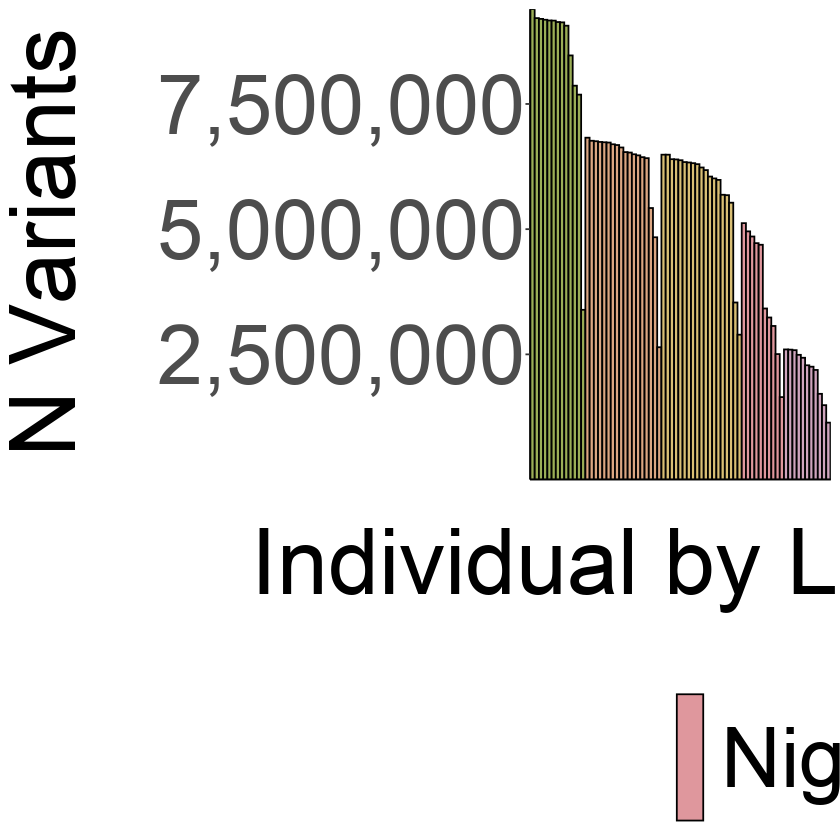

In [8]:
n_variants_plot <- ggplot(n_variants, aes(x = id, y = n_variants, fill = lineage)) + geom_bar(position = 'stack', stat = 'identity', color = 'black', alpha = 0.8, width = 1) +
xlab('\nIndividual by Lineage\n') + ylab('N Variants\n') +
scale_y_continuous(breaks = c(2500000, 5000000, 7500000), labels = c('2,500,000','5,000,000','7,500,000'), expand = c(0, 0), limits = c(0, NA)) +
scale_fill_manual(labels = c('Bonobo', 'Central Chimpanzee', 'Eastern Chimpanzee', 'Nigeria-Cameroon Chimpanzee', 'Western Chimpanzee'), name = '', values = c(ppn_color, ptt_color, pts_color, pte_color, ptv_color)) +
theme_classic() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.ticks.x = element_blank(), axis.text.x = element_blank(), axis.text.y = element_text(size = 20)) +
theme(legend.title = element_text(size = 20), legend.text = element_text(face = 'italic', size = 20)) +
theme(legend.position = 'bottom', legend.text = element_text(margin = margin(r = 3, unit = 'cm')))

n_variants_plot

In [9]:
pdf('suppl_figs/n_variants_plot.pdf', height = 10, width = 24)
n_variants_plot
dev.off()

png 
  2

## Contact Values Distribution

In [10]:
random_contacts = read.csv('../data/predictions/HFF/random.txt', sep = '\t', header = FALSE)
head(random_contacts)

,V1
,<dbl>
1,-0.07969698
2,-0.08148655
3,0.12285706
4,-0.47345644
5,-0.15916070
6,0.16127333


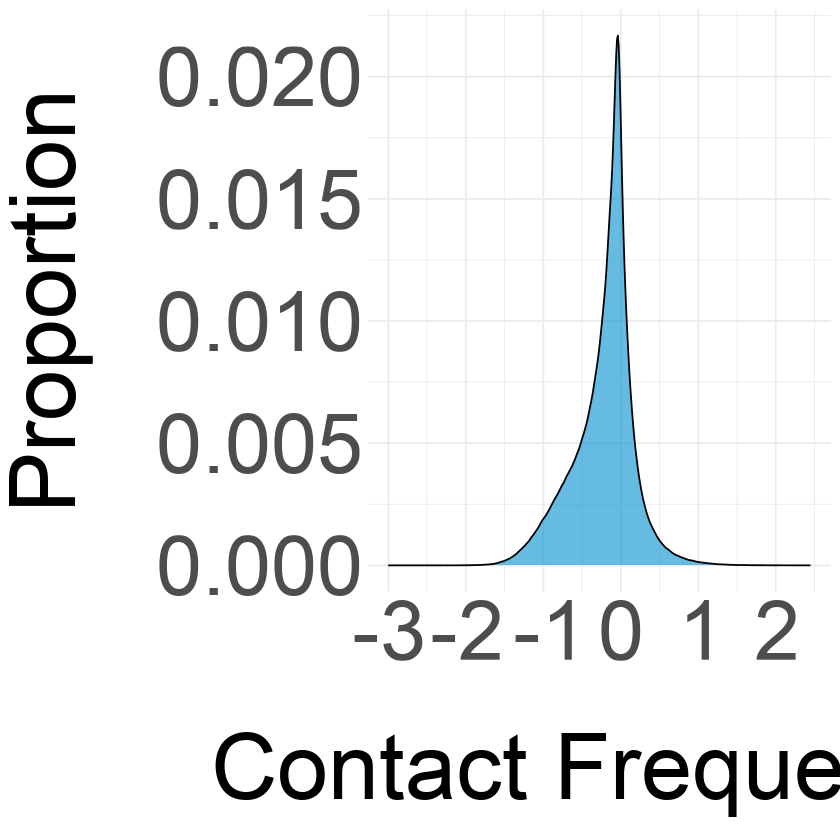

In [11]:
contact_values_distribution_plot <- ggplot(random_contacts, aes(V1, ..count../sum(..count..))) + geom_density(fill = '#008ECE', alpha = 0.6) + 
xlab('\nContact Frequency') + ylab('Proportion\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

contact_values_distribution_plot

In [12]:
pdf('suppl_figs/contact_values_distribution_plot.pdf', height = 8, width = 12)
contact_values_distribution_plot
dev.off()

png 
  2

## Divergence Distribution <a class = 'anchor' id = 'divergencedistribution'></a>

Examine the overall distribution of divergence among all window pairs.

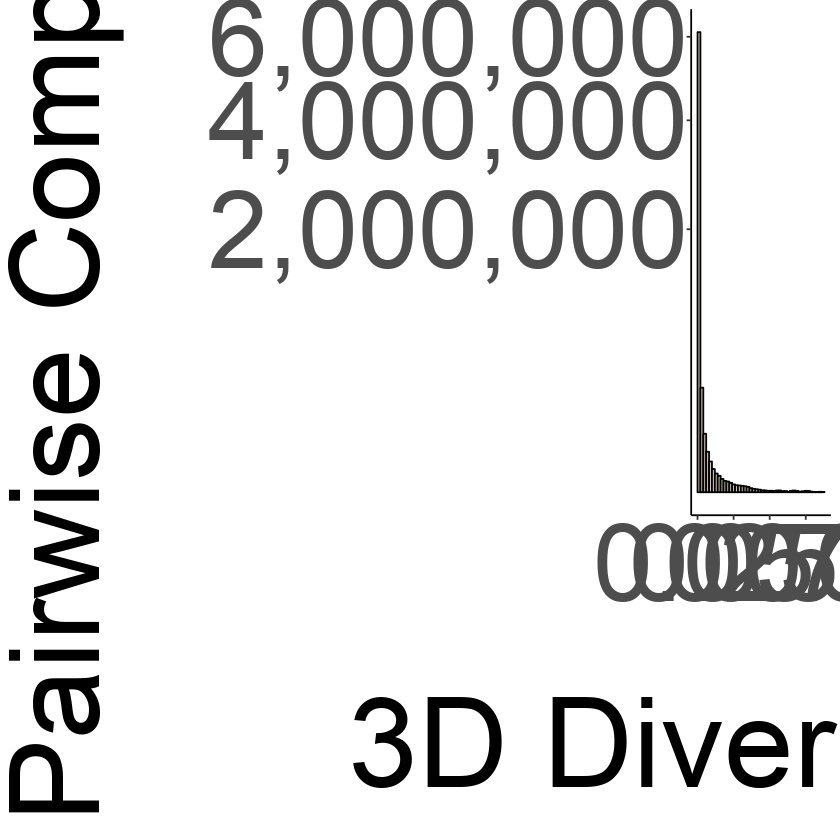

In [13]:
window_histogram = ggplot(comparisons, aes(x = divergence)) + geom_histogram(binwidth = 0.02, center = 0.01, color = 'black', fill = '#d1c7bc') +
xlab('\n3D Divergence') + ylab('N Pairwise Comparisons\n') + coord_trans(y = 'sqrt') +
scale_y_continuous(breaks = c(2000000, 4000000, 6000000), labels = c('2,000,000','4,000,000','6,000,000')) + 
theme_classic() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 30), axis.text.x = element_text(size = 26), axis.text.y = element_text(size = 26))

window_histogram

In [14]:
#window_histogram_inset = ggplot(comparisons, aes(x = divergence)) + geom_histogram(binwidth = 0.01, center = 0.005, color = 'black', fill = 'grey85', alpha = 0.6) +
#xlim (0.2, 0.9) + ylim (0, 3500) +
#xlab('') + ylab('') + coord_trans(y = 'sqrt') +
#theme_minimal() + theme(text = element_text(family = 'Arial')) +
#theme(axis.title = element_text(size = 30), axis.text.x = element_text(size = 26), axis.text.y = element_text(size = 26))

#window_histogram_inset

In [15]:
pdf('main_figs/window_histogram.pdf', height = 15, width = 15)
window_histogram
dev.off()

png 
  2

Now let's create an inset. Note the constant for the text size to ensure that a smaller dimension file for the inset results in the same font size as the figure above.

In [16]:
high_divergence_comparisons <- subset(comparisons, divergence >= 0.2)
head(high_divergence_comparisons)

,ind1,ind2,dyad_type,chr,window_start,window,mse,spearman,divergence,seq_diff
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>
2323,Akwaya-Jean,Alfred,pte-ptt,chr2B,79691776,chr2B_79691776,0.004675024,0.7875654,0.2124346,2471
2573,Akwaya-Jean,Alfred,pte-ptt,chr3,93847552,chr3_93847552,0.003550734,0.7783207,0.2216793,3103
2874,Akwaya-Jean,Alfred,pte-ptt,chr4,68681728,chr4_68681728,0.004156115,0.7415150,0.2584850,3415
3488,Akwaya-Jean,Alfred,pte-ptt,chr6,90177536,chr6_90177536,0.008007103,0.6913133,0.3086867,2276
6330,Akwaya-Jean,Alice,pte-ptv,chr2A,21495808,chr2A_21495808,0.015962159,0.7649633,0.2350367,2224
6331,Akwaya-Jean,Alice,pte-ptv,chr2A,22020096,chr2A_22020096,0.014963722,0.6577698,0.3422302,2240


In [17]:
#high_divergence_IDWs_dist = read.csv('../data/dataframes/high_divergence_IDWs_dist.txt', sep = '\t', header = TRUE)
#head(high_divergence_IDWs_dist)

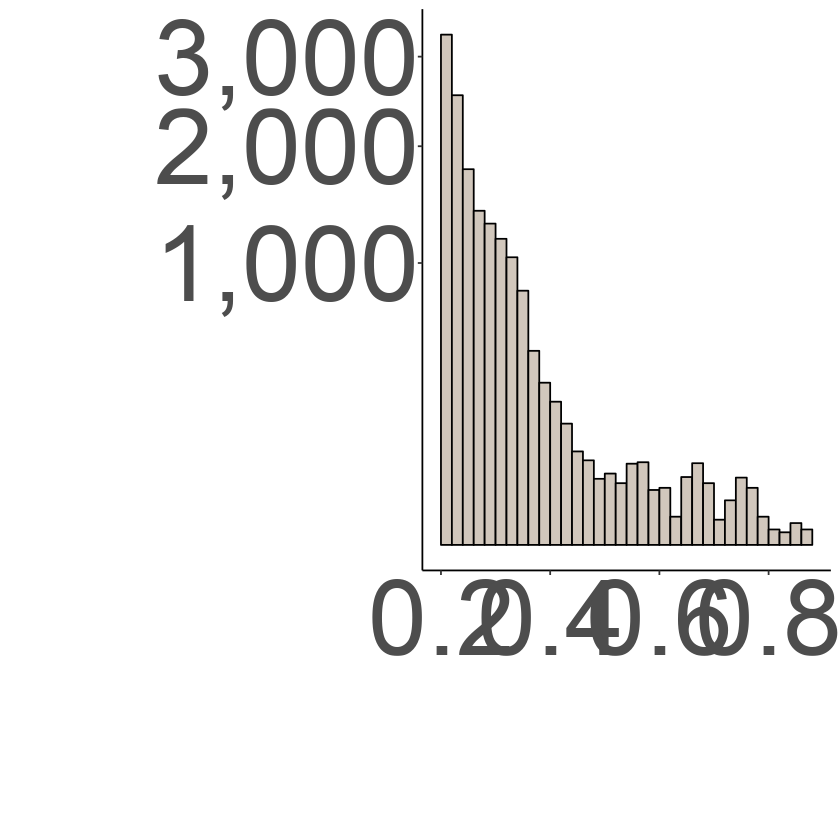

In [18]:
window_histogram_inset <- ggplot(high_divergence_comparisons, aes(x = divergence)) + geom_histogram(binwidth = 0.02, center = 0.01, color = 'black', fill = '#d1c7bc', position = 'identity') +
#coord_cartesian(xlim = c(0.3,0.9)) +
xlab('') + ylab('') + scale_y_continuous(breaks = c(0,1000,2000,3000), labels = c('0','1,000','2,000','3,000')) + coord_trans(y = 'sqrt') +
#scale_fill_manual(labels = c('All Windows', 'IDWs'), name = 'Window Type   ', values = c('grey85', '#e18942')) +
theme_classic() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 26*1.161), axis.text.x = element_text(size = 22*1.161), axis.text.y = element_text(size = 22*1.161)) +
theme(legend.title = element_text(size = 18*1.161), legend.text = element_text(size = 18*1.161)) +
theme(legend.position = 'bottom', legend.text = element_text(margin = margin(r = 0.5, unit = 'cm')))

window_histogram_inset

In [19]:
pdf('main_figs/window_histogram_inset.pdf', height = 10, width = 11)
window_histogram_inset
dev.off()

png 
  2

## Pan-Homo Divergence Distribution <a class = 'anchor' id = 'panhomodivergencedistribution'></a>

In [20]:
#human_comparisons = read.csv('../data/comparisons/thousand_genomes_subset_HFF/melted_130v130_1KG_subsample.csv', sep = ',', header = TRUE)
#head(human_comparisons)

In [21]:
#pan_homo_window_histogram <- ggplot(comparisons, aes(x = divergence)) + geom_histogram(aes(y = ..count../sum(..count..)), binwidth = 0.02, center = 0.01, color = 'black', fill = '#71c3e5') +
#geom_histogram(data = human_comparisons, aes(x = X3d_divergence, y = ..count../sum(..count..)),  binwidth = 0.02, center = 0.01, color = 'black', fill = '#ac83bd', alpha = 0.6) +
#xlab('\n3D Divergence') + ylab('Proportion of\nPairwise Comparisons\n') + coord_trans(y = 'sqrt') +
#theme_minimal() + theme(text = element_text(family = 'Arial')) +
#theme(axis.title = element_text(size = 30), axis.text.x = element_text(size = 26), axis.text.y = element_text(size = 26))

#pan_homo_window_histogram

In [22]:
#pdf('suppl_figs/pan_homo_window_histogram.pdf', height = 12, width = 24)
#pan_homo_window_histogram
#dev.off()

## Ultraconserved and Primate-Conserved Window Maximum Distribution <a class = 'anchor' id = 'ultraprimateconserveddistribution'></a>

In [23]:
window_maxes = read.csv('../data/Okhovat_et_al_2023/window_maxes.txt', sep = '\t', header = FALSE)
colnames(window_maxes) <- c('max')
window_maxes$dist <- 'Genome-Wide'
head(window_maxes)

,max,dist
,<dbl>,<chr>
1,0.12895897,Genome-Wide
2,0.10149728,Genome-Wide
3,0.03360769,Genome-Wide
4,0.13884825,Genome-Wide
5,0.03186678,Genome-Wide
6,0.08244390,Genome-Wide


In [24]:
ultraconserved_maxes = read.csv('../data/Okhovat_et_al_2023/ultraconserved_window_maxes.txt', sep = '\t', header = FALSE)
colnames(ultraconserved_maxes) <- c('max')
ultraconserved_maxes$dist <- 'UltraConserved'
head(ultraconserved_maxes)

,max,dist
,<dbl>,<chr>
1,0.036526326,UltraConserved
2,0.006578745,UltraConserved
3,0.017641361,UltraConserved
4,0.002978481,UltraConserved
5,0.021275480,UltraConserved
6,0.008742262,UltraConserved


In [25]:
ultraconserved_maxes <- rbind(window_maxes, ultraconserved_maxes)

In [26]:
head(ultraconserved_maxes)

,max,dist
,<dbl>,<chr>
1,0.12895897,Genome-Wide
2,0.10149728,Genome-Wide
3,0.03360769,Genome-Wide
4,0.13884825,Genome-Wide
5,0.03186678,Genome-Wide
6,0.08244390,Genome-Wide


In [27]:
nrow(ultraconserved_maxes)

[1] 5371

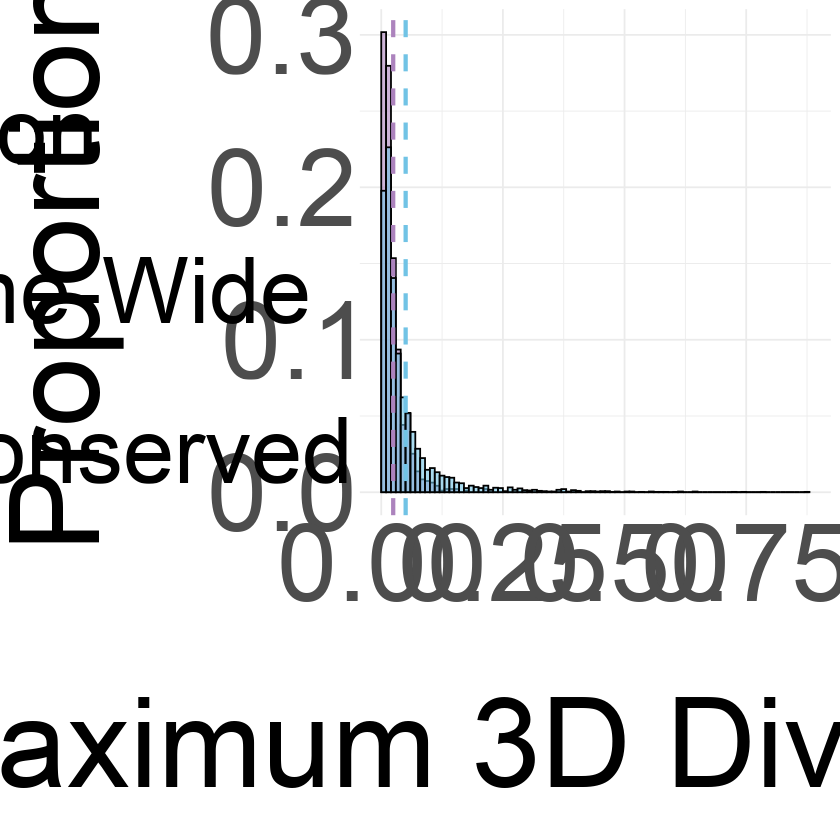

In [28]:
ultraconserved_maxes_histogram <- ggplot(ultraconserved_maxes, aes(x = max)) +
geom_histogram(data = subset(ultraconserved_maxes, dist == 'UltraConserved'), aes(x = max, y = ..count../sum(..count..), fill = dist), binwidth = 0.01, center = 0.005, color = 'black', alpha = 0.6) +
geom_histogram(data = subset(ultraconserved_maxes, dist == 'Genome-Wide'), aes(x = max, y = ..count../sum(..count..), fill = dist), binwidth = 0.01, center = 0.005, color = 'black', alpha = 0.6) +
geom_vline(xintercept = 0.05016095426516081, linetype = 'dashed', color = '#71c3e5', size = 1.2) +
geom_vline(xintercept = 0.024565984185433182, linetype = 'dashed', color = '#ac83bd', size = 1.2) +
scale_fill_manual(name = 'Distribution', values = c('#71c3e5','#ac83bd')) +
xlab('\nMaximum 3D Divergence') + ylab('Proportion\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 30), axis.text.x = element_text(size = 26), axis.text.y = element_text(size = 26)) +
theme(legend.position = c(0.92, 0.92), legend.justification = c('right', 'top'), legend.box.just = 'right', legend.margin = margin(6, 6, 6, 6)) +
guides(fill = guide_legend(byrow = TRUE)) +
theme(legend.title = element_text(size = 22), legend.text = element_text(size = 22), legend.spacing.x = unit(1.0, 'cm'))

ultraconserved_maxes_histogram

In [29]:
primate_conserved_maxes = read.csv('../data/Okhovat_et_al_2023/primate_conserved_window_maxes.txt', sep = '\t', header = FALSE)
colnames(primate_conserved_maxes) <- c('max')
primate_conserved_maxes$dist <- 'Primate-Conserved'
head(primate_conserved_maxes)

,max,dist
,<dbl>,<chr>
1,0.140252595,Primate-Conserved
2,0.039723780,Primate-Conserved
3,0.009116284,Primate-Conserved
4,0.028704889,Primate-Conserved
5,0.015983505,Primate-Conserved
6,0.009440741,Primate-Conserved


In [30]:
primate_conserved_maxes <- rbind(window_maxes, primate_conserved_maxes)

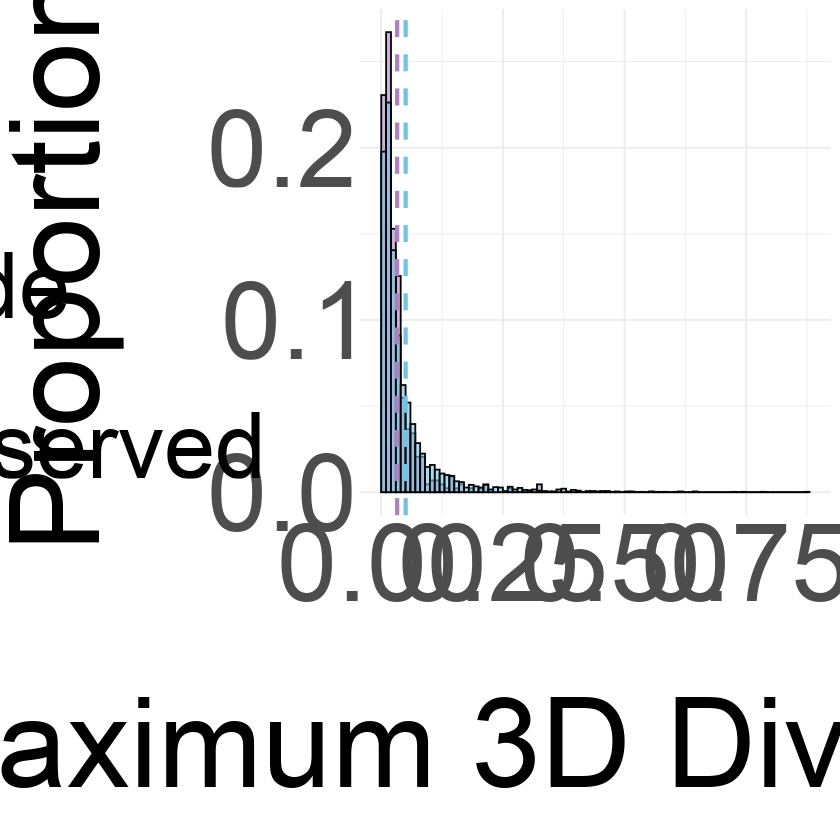

In [31]:
primate_conserved_maxes_histogram <- ggplot(primate_conserved_maxes, aes(x = max)) +
geom_histogram(data = subset(primate_conserved_maxes, dist == 'Primate-Conserved'), aes(x = max, y = ..count../sum(..count..), fill = dist), binwidth = 0.01, center = 0.005, color = 'black', alpha = 0.6) +
geom_histogram(data = subset(primate_conserved_maxes, dist == 'Genome-Wide'), aes(x = max, y = ..count../sum(..count..), fill = dist), binwidth = 0.01, center = 0.005, color = 'black', alpha = 0.6) +
geom_vline(xintercept = 0.05016095426516081, linetype = 'dashed', color = '#71c3e5', size = 1.2) +
geom_vline(xintercept = 0.03270146757034698, linetype = 'dashed', color = '#ac83bd', size = 1.2) +
scale_fill_manual(name = 'Distribution', values = c('#71c3e5','#ac83bd')) +
xlab('\nMaximum 3D Divergence') + ylab('Proportion\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 30), axis.text.x = element_text(size = 26), axis.text.y = element_text(size = 26)) +
theme(legend.position = c(0.95, 0.93), legend.justification = c('right', 'top'), legend.box.just = 'right', legend.margin = margin(6, 6, 6, 6)) +
guides(fill = guide_legend(byrow = TRUE)) +
theme(legend.title = element_text(size = 22), legend.text = element_text(size = 22), legend.spacing.x = unit(1.0, 'cm'))

primate_conserved_maxes_histogram

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”


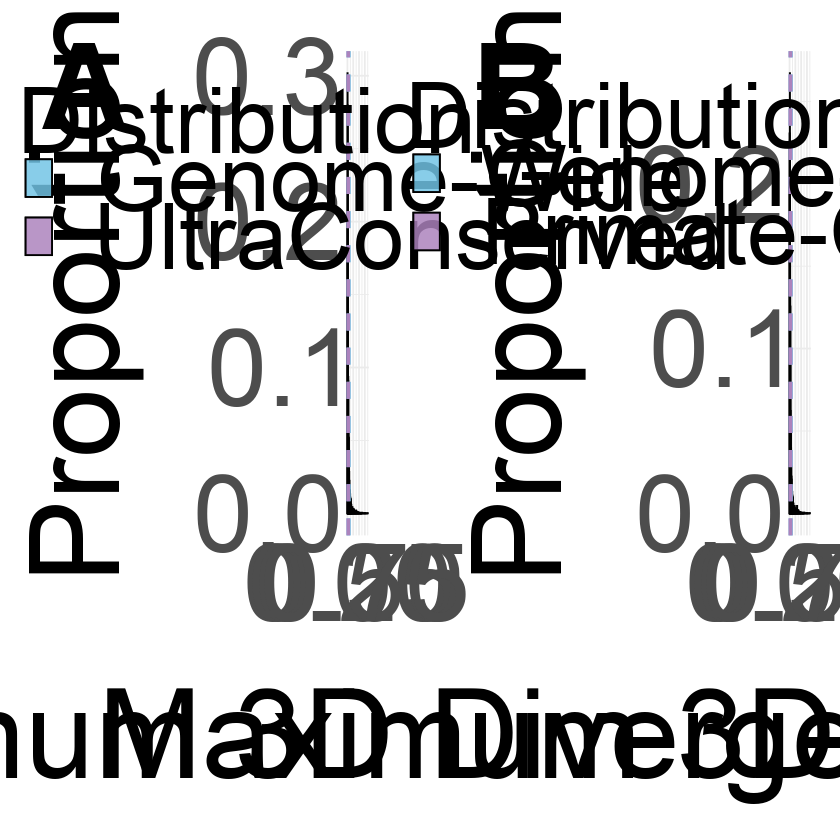

In [32]:
row <- plot_grid(ultraconserved_maxes_histogram, NULL, primate_conserved_maxes_histogram, labels = c('A','','B'), label_size = 30, rel_widths = c(0.45,0.05,0.45), nrow = 1, scale = 0.9)
row

In [33]:
pdf('suppl_figs/ultraconserved_primate_conserved_window_maximum_histograms.pdf', height = 12, width = 20)
row
dev.off()

png 
  2

## Genome-Wide Average per Dyad Type

Boxplots.

In [34]:
comparisons_simple = comparisons
comparisons_simple$dyad_type <- str_replace_all(comparisons_simple$dyad_type, c('pte-pts'='pt-pt', 'pte-ptt'='pt-pt', 'pte-ptv'='pt-pt', 'pts-ptt'='pt-pt', 'pts-ptv'='pt-pt', 'ptt-ptv'='pt-pt'))
head(comparisons_simple)

,ind1,ind2,dyad_type,chr,window_start,window,mse,spearman,divergence,seq_diff
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,Akwaya-Jean,Alfred,pt-pt,chr10,1572864,chr10_1572864,0.0001679965,0.9876550,0.012344984,2803
2,Akwaya-Jean,Alfred,pt-pt,chr10,2097152,chr10_2097152,0.0004808925,0.9698092,0.030190797,2715
3,Akwaya-Jean,Alfred,pt-pt,chr10,2621440,chr10_2621440,0.0016745600,0.9963985,0.003601548,2849
4,Akwaya-Jean,Alfred,pt-pt,chr10,3145728,chr10_3145728,0.0003225794,0.9978993,0.002100716,2606
5,Akwaya-Jean,Alfred,pt-pt,chr10,3670016,chr10_3670016,0.0001429828,0.9967316,0.003268396,2594
6,Akwaya-Jean,Alfred,pt-pt,chr10,4194304,chr10_4194304,0.0022898065,0.9975879,0.002412069,2885


In [35]:
nrow(comparisons_simple)

[1] 6669390

In [36]:
aggregate(divergence ~ dyad_type, data = comparisons_simple, median)

dyad_type,divergence
<chr>,<dbl>
ppn,0.0008288782
ppn-pt,0.0041300803
pt-pt,0.0023307224
pte,0.0012816679
pts,0.0016288776
ptt,0.0021648987
ptv,0.0005900994


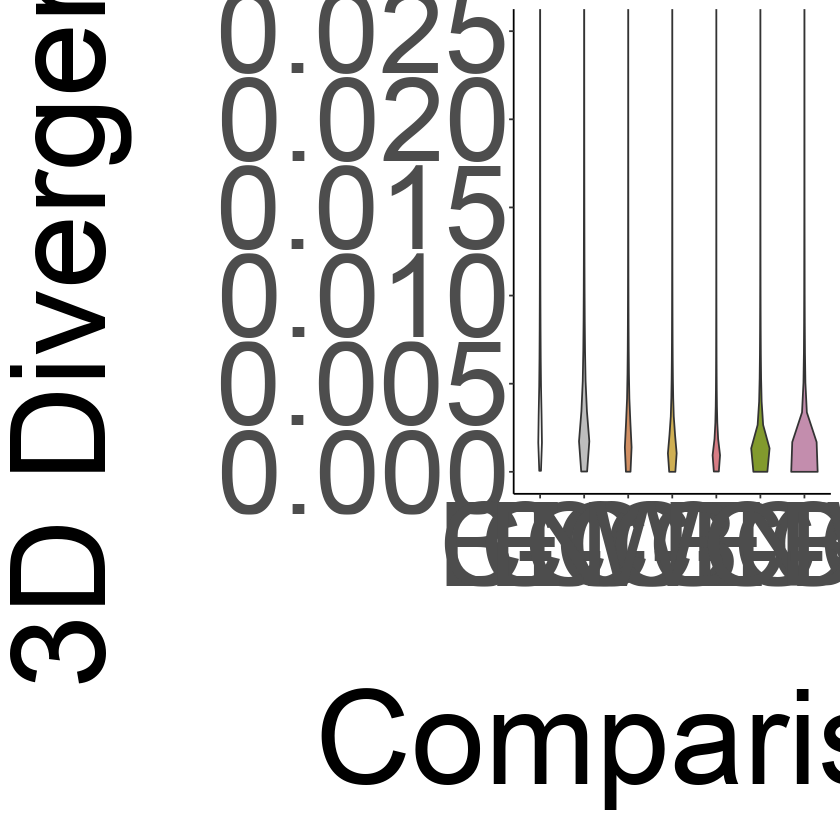

In [39]:
dyad_violin_simple <- ggplot(comparisons_simple, aes(x = reorder(dyad_type, -divergence), y = divergence, fill = dyad_type), fill = 'transparent') + geom_violin(width = 0.6) +
xlab('\nComparison') + ylab('3D Divergence\n') + 
coord_cartesian(ylim = c(0,0.025)) + theme_classic() + theme(panel.background = element_rect(fill = 'transparent', colour = NA), plot.background = element_rect(fill = 'transparent', colour = NA)) +
theme(text = element_text(family = 'Arial')) +
scale_x_discrete(labels = c('B-C','C-C','CC-CC','EC-EC','NC-NC','B-B','WC-WC')) +
scale_fill_manual(values = c(ppn_color, 'white', 'grey', pte_color, pts_color, ptt_color, ptv_color)) +
theme(axis.title = element_text(size = 32), axis.text.x = element_text(size = 28), axis.text.y = element_text(size = 28)) +
theme(legend.position = 'none') 

dyad_violin_simple

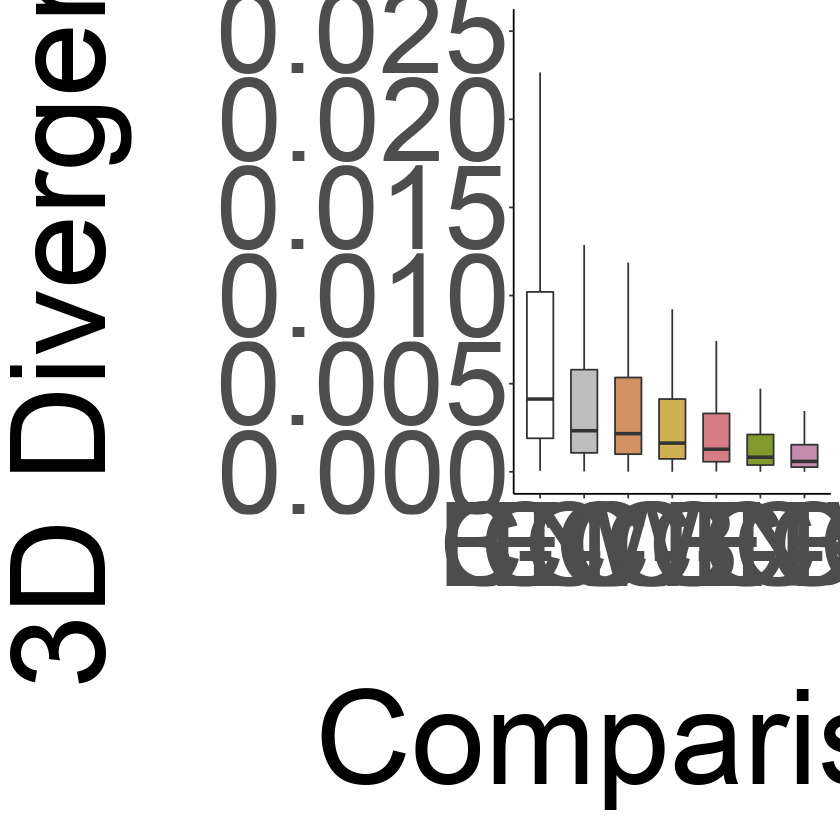

In [37]:
dyad_boxplots_simple <- ggplot(comparisons_simple, aes(x = reorder(dyad_type, -divergence), y = divergence, fill = dyad_type), fill = 'transparent') + geom_boxplot(outlier.shape = NA, width = 0.6) +
xlab('\nComparison') + ylab('3D Divergence\n') + 
coord_cartesian(ylim = c(0,0.025)) + theme_classic() + theme(panel.background = element_rect(fill = 'transparent', colour = NA), plot.background = element_rect(fill = 'transparent', colour = NA)) +
theme(text = element_text(family = 'Arial')) +
scale_x_discrete(labels = c('B-C','C-C','CC-CC','EC-EC','NC-NC','B-B','WC-WC')) +
scale_fill_manual(values = c(ppn_color, 'white', 'grey', pte_color, pts_color, ptt_color, ptv_color)) +
theme(axis.title = element_text(size = 32), axis.text.x = element_text(size = 28), axis.text.y = element_text(size = 28)) +
theme(legend.position = 'none') 

dyad_boxplots_simple

In [38]:
pdf('main_figs/dyad_boxplots.pdf', height = 18, width = 18, bg = 'transparent')
dyad_boxplots_simple
dev.off()

png 
  2

## IDW Ns

In [112]:
IDW_stats_per_individual = read.csv('../data/window_topologies/IDW_stats_per_ind.txt', sep = '\t', header = TRUE)
head(IDW_stats_per_individual)

,IDW_ind,lineage,N,min,mean,max
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Akwaya-Jean,pte,16,0.011237478,0.04947819,0.2043796
2,Alfred,ptt,21,0.004539219,0.05570643,0.2012468
3,Alice,ptv,9,0.008468631,0.11871172,0.5025254
4,Andromeda,pts,12,0.013257149,0.05090488,0.1076266
5,Athanga,pts,13,0.006030998,0.12600212,0.4630064
6,Berta,ptv,6,0.007774569,0.32248823,0.8736046


In [113]:
n_IDWs_seq <- seq(1,34,1)
n_IDWs <- data.frame(n_IDWs_seq)
colnames(n_IDWs) <- c('N')
n_IDWs$prop <- sapply(n_IDWs$N, function(x) {sum(IDW_stats_per_individual$N >= x)/56})
head(n_IDWs)

,N,prop
,<dbl>,<dbl>
1,1,1.0000000
2,2,0.9821429
3,3,0.9821429
4,4,0.9642857
5,5,0.9642857
6,6,0.9642857


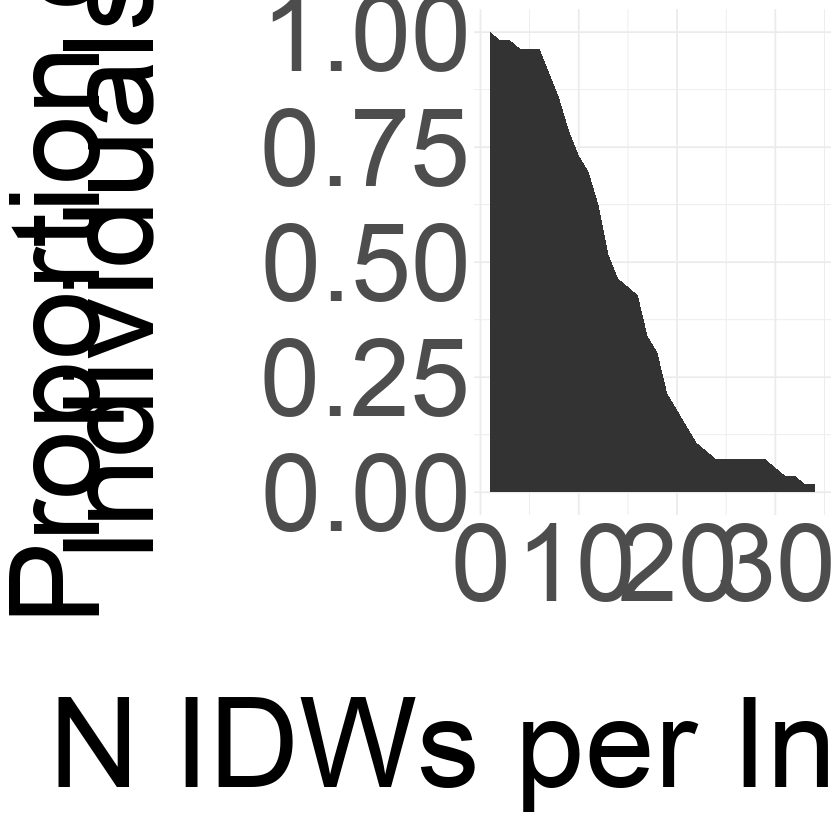

In [114]:
n_IDWs_plot <- ggplot(n_IDWs, aes(x = N, y = prop)) + geom_ribbon(aes(ymin = 0, ymax = prop)) +
xlab('\nN IDWs per Individual') + ylab('Proportion of\nIndividuals\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 30), axis.text.x = element_text(size = 26), axis.text.y = element_text(size = 26))

n_IDWs_plot

## IDW Min, Mean, and Max per Individual

In [115]:
replacements <- c('Cindy-schwein' = 'Cindy (EC)', 'Cindy-troglodytes' = 'Cindy (CC)', 'Cindy-verus' = 'Cindy (WC)', 'Coco-chimp' = 'Coco', 'Julie-A959' = 'Julie (CC)', 'Julie-LWC21' = 'Julie (NC)')
IDW_stats_per_individual$IDW_ind <- str_replace_all(IDW_stats_per_individual$IDW_ind, replacements)

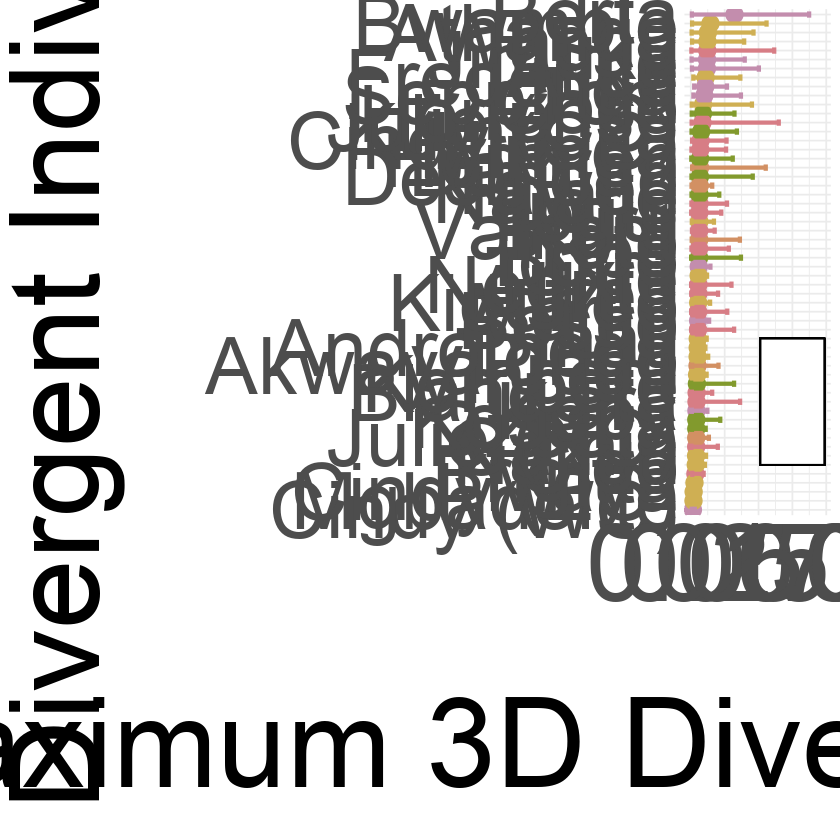

In [116]:
IDW_stats_per_individual_plot <- ggplot(IDW_stats_per_individual, aes(y = reorder(IDW_ind, mean))) + geom_point(aes(x = mean, color = lineage), size = 4.5) +
geom_errorbarh(data = IDW_stats_per_individual, aes(xmin = min, xmax = max, color = lineage), height = 0.7, size = 1.2, show.legend = FALSE) +
scale_color_manual(labels = c('Bonobo', 'Central Chimpanzee', 'Eastern Chimpanzee', 'Nigeria-Cameroon Chimpanzee', 'Western Chimpanzee'), name = 'Lineage', values = c(ppn_color, ptt_color, pts_color, pte_color, ptv_color)) +
xlab('\nMaximum 3D Divergence in IDW') + ylab('Divergent Individual\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
geom_rect(aes(xmin = 0.515, xmax = 0.985, ymin = 'Cleo', ymax = 'Bihati'), color = 'black', size = 0.5, fill = 'white') +
theme(axis.title = element_text(size = 30), axis.text.x = element_text(size = 26), axis.text.y = element_text(size = 19)) +
theme(legend.position = c(0.925, 0.35), legend.justification = c('right', 'top'), legend.box.just = 'right', legend.margin = margin(6, 6, 6, 6)) +
theme(legend.title = element_text(size = 22), legend.text = element_text(size = 22)) +
theme(legend.spacing.y = unit(0.7, 'cm')) + guides(color = guide_legend(byrow = TRUE))

IDW_stats_per_individual_plot

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”


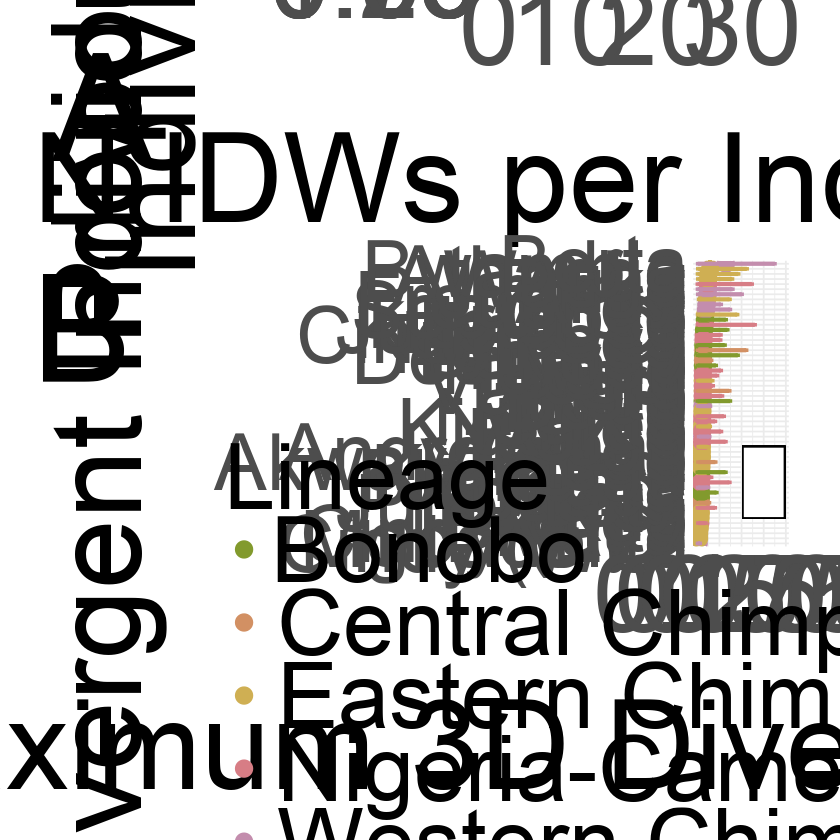

In [117]:
column <- plot_grid(n_IDWs_plot, NULL, IDW_stats_per_individual_plot, labels = c('A','','B'), label_size = 36, rel_heights = c(0.25,0.01,0.73), ncol = 1, scale = 0.9)
column

In [118]:
pdf('suppl_figs/IDWs_plot.pdf', height = 24, width = 16)
column
dev.off()

png 
  2

## MDWs

In [119]:
MDW_windows_small_cluster_counts_summary = read.csv('../data/window_topologies/MDW_windows_small_cluster_counts_summary.txt', sep = '\t', header = TRUE)
head(MDW_windows_small_cluster_counts_summary)

,small_cluster_N,N
,<int>,<int>
1,2,436
2,3,264
3,4,166
4,5,154
5,6,122
6,7,98


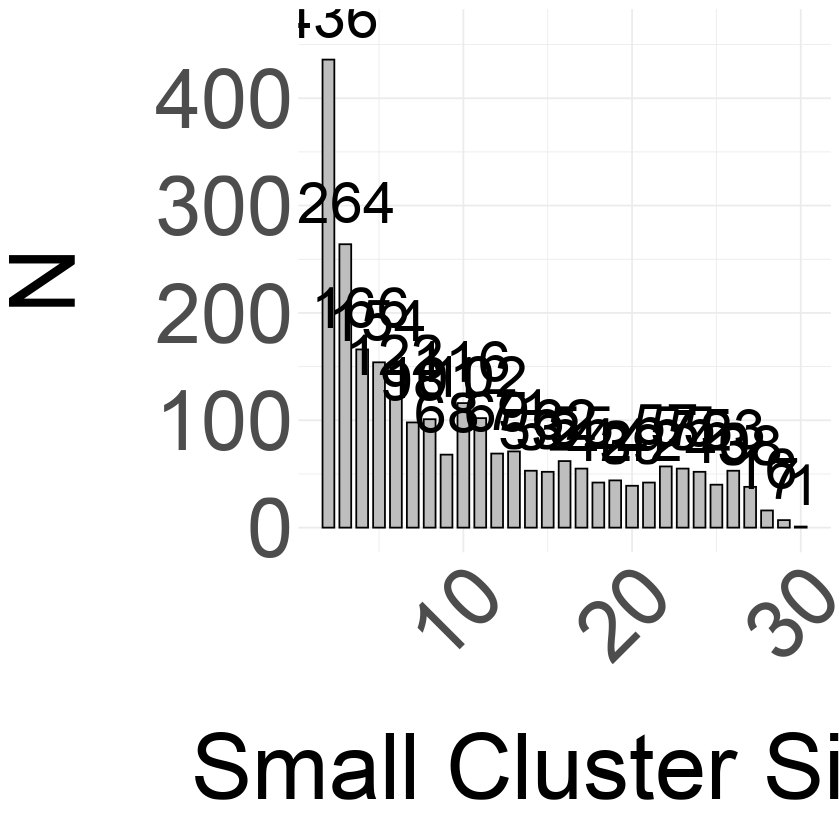

In [132]:
MDW_windows_small_cluster_counts_summary_plot <- ggplot(MDW_windows_small_cluster_counts_summary, aes(x = small_cluster_N, y = N)) + geom_bar(stat = 'identity', width = 0.7, color = 'black', fill = 'grey') + geom_text(aes(label = N), vjust = -0.5, family = 'Arial', size = 5) +
coord_cartesian(ylim = c(0,460)) +
xlab('\nSmall Cluster Size') + ylab('N\n') + theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20, angle = 45, hjust = 1), axis.text.y = element_text(size = 20))


MDW_windows_small_cluster_counts_summary_plot

In [133]:
MDW_windows_small_cluster_composition = read.csv('../data/window_topologies/MDW_windows_small_cluster_composition.txt', sep = '\t', header = TRUE)
colnames(MDW_windows_small_cluster_composition) <- c('Bonobo','Nigeria-Cameroon Chimpanzee','Eastern Chimpanzee','Central Chimpanzee','Western Chimpanzee')
head(MDW_windows_small_cluster_composition)

,Bonobo,Nigeria-Cameroon Chimpanzee,Eastern Chimpanzee,Central Chimpanzee,Western Chimpanzee
,<chr>,<chr>,<chr>,<chr>,<chr>
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,True
4,True,True,True,True,False
5,True,False,False,False,False
6,True,False,False,False,False


Warning message in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, :
“Converting non-logical columns to binary: Bonobo, Nigeria-Cameroon Chimpanzee, Eastern Chimpanzee, Central Chimpanzee, Western Chimpanzee”


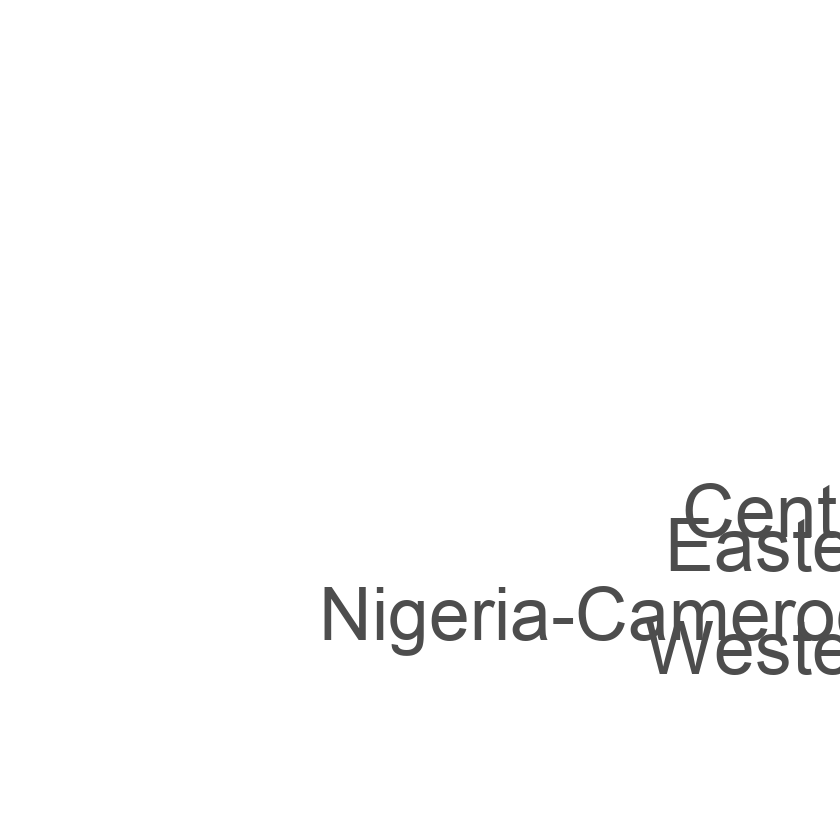

In [134]:
MDW_windows_small_cluster_composition_upset_plot <- upset(data = MDW_windows_small_cluster_composition, intersect = colnames(MDW_windows_small_cluster_composition), sort_sets = 'descending',
                      name = '', 
                      min_size = 0,
                      height_ratio = 0.4,
                      width_ratio = 0.25,
                      set_sizes = FALSE,
                      matrix=(intersection_matrix(geom=geom_point(size=6))),
                      base_annotations = list('Intersection size' = intersection_size(text = list(family = 'Arial', size = 5))),
                      themes = upset_modify_themes(list('Intersection size' = theme(text = element_text(family = 'Arial', size = 22)),  
                                                        'intersections_matrix' = theme(text = element_text(family = 'Arial', size = 22)))))

MDW_windows_small_cluster_composition_upset_plot 

In [135]:
pdf('suppl_figs/MDW_windows_small_cluster_composition_upset_plot.pdf', width = 24, height = 15)
MDW_windows_small_cluster_composition_upset_plot
dev.off()

png 
  2

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warnin

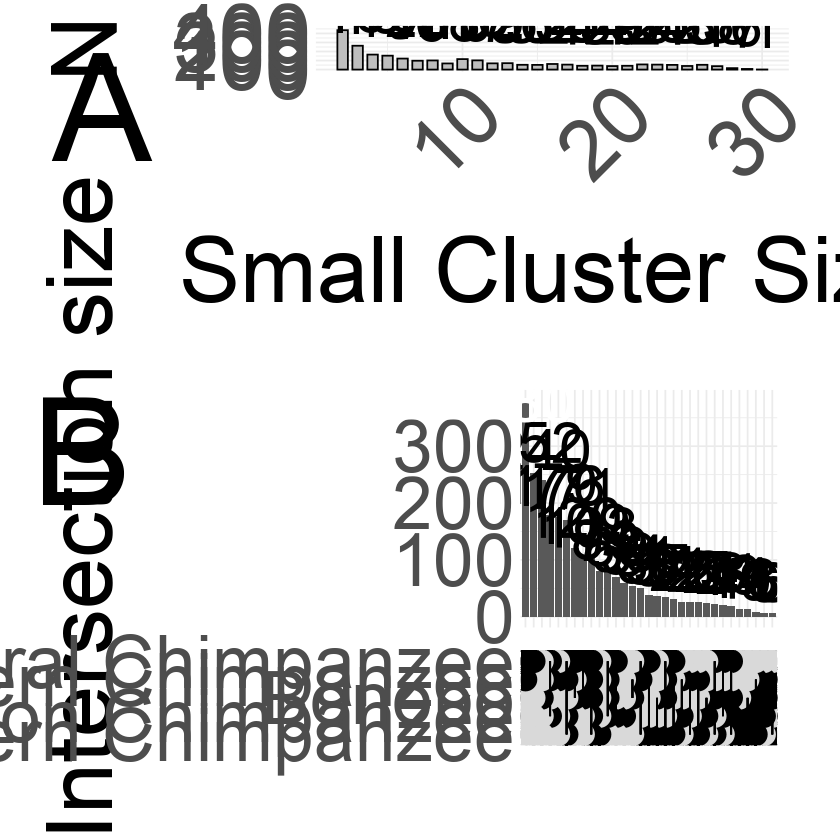

In [136]:
column <- plot_grid(MDW_windows_small_cluster_counts_summary_plot, NULL, MDW_windows_small_cluster_composition_upset_plot, labels = c('A','','B'), label_size = 36, rel_heights = c(0.4,0.01,0.59), ncol = 1, scale = 0.9)
column

In [137]:
pdf('suppl_figs/MDWs_plot.pdf', width = 20, height = 18)
column
dev.off()

png 
  2

## Window Maxima by Topology

In [ ]:
IDW_window_maxes = read.csv('../data/window_topologies/IDW_window_maxes.txt', sep = '\t', header = FALSE)
colnames(IDW_window_maxes) <- c('max')
IDW_window_maxes$topology <- 'IDW'
head(IDW_window_maxes)

In [ ]:
MDW_window_maxes = read.csv('../data/window_topologies/MDW_window_maxes.txt', sep = '\t', header = FALSE)
colnames(MDW_window_maxes) <- c('max')
MDW_window_maxes$topology <- 'MDW'
head(MDW_window_maxes)

In [ ]:
ppn_ptr_window_maxes = read.csv('../data/window_topologies/ppn_ptr_window_maxes.txt', sep = '\t', header = FALSE)
colnames(ppn_ptr_window_maxes) <- c('max')
ppn_ptr_window_maxes$topology <- 'B-C'
head(ppn_ptr_window_maxes)

In [ ]:
topology_maxes <- rbind(IDW_window_maxes, MDW_window_maxes, ppn_ptr_window_maxes)
topology_maxes$topology <- factor(topology_maxes$topology, levels = c('IDW', 'MDW', 'B-C'))
head(topology_maxes)

In [ ]:
topology_maxes <- ggplot(topology_maxes, aes(x = topology, y = max)) + geom_violin() + 
geom_boxplot(width = 0.1, outlier.shape = NA) + coord_trans(y = 'sqrt') +
#scale_fill_manual(values = c('#71c3e5','#ac83bd','green')) +
xlab('\nTwo Cluster Window Topology') + ylab('Maximum 3D Divergence\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 30), axis.text.x = element_text(size = 26), axis.text.y = element_text(size = 26)) +
theme(legend.position = 'none')

topology_maxes

In [ ]:
pdf('suppl_figs/topology_maxes.pdf', height = 15, width = 15)
topology_maxes
dev.off()

## TADs Distribution and Location

In [ ]:
chrs = read.csv('../data/metadata/panTro6_chr_lengths.txt', sep = '\t', header = FALSE)
names(chrs) <- c('chr','length')
chrs$chr <- factor(chrs$chr, levels = c('chr1','chr2A','chr2B','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX'))
head(chrs)

In [ ]:
excluded_windows = read.csv('../data/metadata/panTro6_excluded_windows.bed', sep = '\t', header = FALSE)
names(excluded_windows) <- c('chr','start','end')
excluded_windows$chr <- as.factor(excluded_windows$chr)

In [ ]:
TADs = read.csv('../data/annotations/panTro6_TADs.bed', sep = '\t', header = FALSE)
names(TADs) <- c('chr','start','end','score','C3624_overlap','C3649_overlap','C3651_overlap','C40300_overlap')
TADs$lengths <- TADs$end - TADs$start
TADs$chr <- as.factor(TADs$chr)

In [ ]:
nrow(TADs)

In [ ]:
TADs_length_distribution_plot <- ggplot(TADs, aes(lengths, ..count..)) + geom_density(fill = '#008ECE', alpha = 0.6) + 
xlab('\nTAD Length') + ylab('Proportion\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

TADs_length_distribution_plot

In [ ]:
TADs_ideogram = ggplot() + geom_col(data = chrs, aes(x = chr, y = length), fill = NA, color = 'black', size = 1.05, width = 0.75) +
    coord_flip() + scale_x_discrete(limits = rev(levels(chrs$chr))) + scale_y_continuous(labels=c(0,50,100,150,200), breaks = c(0,50000000,100000000,150000000,200000000)) +
    geom_rect(data = excluded_windows, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = 'grey65', alpha = 0.3, size = 12.5) +
    geom_rect(data = TADs, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = '#008ECE', alpha = 0.3, size = 12.5) +
    geom_col(data = chrs, aes(x = chr, y = length), fill = NA, color = 'black', size = 1.05, width = 0.75) +
    xlab('Chromosome\n') + ylab ('\nGenomic Position (Mb)') +
    theme_classic() + theme(text = element_text(family = 'Arial')) + theme(axis.line = element_blank(), axis.ticks.y = element_blank()) +
    theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

TADs_ideogram

In [ ]:
column <- plot_grid(TADs_length_distribution_plot, TADs_ideogram, labels = c('A','B'), label_size = 30, rel_heights = c(0.25,0.75), ncol = 1, scale = 0.9)

In [ ]:
pdf('suppl_figs/TADs_distribution_and_ideogram.pdf', height = 22, width = 16)
column
dev.off()

## Bonobo - Chimpanzee Dyad Separation Counts

In [ ]:
ppn_pt_dyad_separation_counts = read.csv('../data/dataframes/ppn_pt_dyad_separation_counts.txt', sep = '\t', header = FALSE)
names(ppn_pt_dyad_separation_counts) <- c('window','n_non_ppn_pt_dyads')

In [ ]:
ppn_pt_dyad_separation_counts_plot <- ggplot(ppn_pt_dyad_separation_counts, aes(n_non_ppn_pt_dyads, ..count..)) + geom_density(fill = '#008ECE', alpha = 0.6) + 
xlab('\nN Non-Bonobo-Chimpanzee Dyads') + ylab('Proportion\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

ppn_pt_dyad_separation_counts_plot

In [ ]:
pdf('suppl_figs/ppn_pt_dyad_separation_counts_plot.pdf', height = 8, width = 12)
ppn_pt_dyad_separation_counts_plot
dev.off()

## Position of Divergent 3d Modifying Variants in TADs

In [ ]:
divergent_3d_modifying_variants_position_in_TAD = read.csv('../data/divergent_windows/ppn_pt_divergent_3d_modifying_variant_variant_positions_in_TADs.txt', sep = '\t', header = FALSE)
names(divergent_3d_modifying_variants_position_in_TAD) <- c('position')

In [ ]:
divergent_3d_modifying_variants_position_in_TAD_histogram <- ggplot(divergent_3d_modifying_variants_position_in_TAD, aes(x = position)) + geom_histogram(binwidth = 0.05, center = 0.025, color = 'black', fill = 'grey85', alpha = 0.6) +
xlab('\nPosition in TAD') + ylab('N 3d Modifying Variants\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

divergent_3d_modifying_variants_position_in_TAD_histogram

In [ ]:
pdf('suppl_figs/divergent_3d_modifying_variants_position_in_TAD_histogram.pdf', height = 8, width = 12)
divergent_3d_modifying_variants_position_in_TAD_histogram
dev.off()

## Bonobo - Chimp Ideogram

In [ ]:
chrs = read.csv('../data/metadata/panTro6_chr_lengths.txt', sep = '\t', header = FALSE)
names(chrs) <- c('chr','length')
chrs$chr <- factor(chrs$chr, levels = c('chr1','chr2A','chr2B','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX'))
head(chrs)

In [ ]:
excluded_windows = read.csv('../data/metadata/panTro6_excluded_windows.bed', sep = '\t', header = FALSE)
names(excluded_windows) <- c('chr','start','end')
excluded_windows$chr <- as.factor(excluded_windows$chr)

In [ ]:
clustering_windows = read.csv('../data/clustering_windows/ppn_pt_clustering_windows.bed', sep = '\t', header = FALSE)
names(clustering_windows) <- c('chr','start','end')
clustering_windows$chr <- as.factor(clustering_windows$chr)

In [ ]:
divergent_windows = read.csv('../data/divergent_windows/ppn_pt_divergent_windows.bed', sep = '\t', header = FALSE)
names(divergent_windows) <- c('chr','start','end')
divergent_windows$chr <- as.factor(divergent_windows$chr)

In [ ]:
ppn_pt_windows_ideogram = ggplot() + geom_col(data = chrs, aes(x = chr, y = length), fill = NA, color = 'black', size = 1.05, width = 0.75) +
    coord_flip() + scale_x_discrete(limits = rev(levels(chrs$chr))) + scale_y_continuous(labels=c(0,50,100,150,200), breaks = c(0,50000000,100000000,150000000,200000000)) +
    geom_rect(data = excluded_windows, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = 'grey80', alpha = 0.3, size = 18.5) +
    geom_rect(data = clustering_windows, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = '#008ECE', alpha = 0.3, size = 18.5) +
    #geom_rect(data = divergent_windows, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = 'red', alpha = 0.3, size = 16) +
    geom_col(data = chrs, aes(x = chr, y = length), fill = NA, color = 'black', size = 1.05, width = 0.75) +
    xlab('Chromosome\n') + ylab ('\nGenomic Position (Mb)') +
    theme_classic() + theme(text = element_text(family = 'Arial')) + theme(axis.line = element_blank(), axis.ticks.y = element_blank()) +
    theme(axis.title = element_text(size = 48), axis.text.x = element_text(size = 44), axis.text.y = element_text(size = 44)) +
    scale_color_manual(values = c('grey65','blue','red'), labels = c('Excluded window','Clustering Window','Divergent Window')) +
    theme(legend.position = 'bottom')

ppn_pt_windows_ideogram

In [ ]:
pdf('suppl_figs/ppn_pt_clustering_windows_ideogram.pdf', height = 20, width = 16)
ppn_pt_windows_ideogram
dev.off()

## Example Bonobo - Chimpanzee Clustering Window Distribution

In [ ]:
subset <- subset(comparisons, window == 'chr2A_58720256')

In [ ]:
subset$label <- ifelse(subset$dyad_type == ('ppn-pt'), 'Bonobo-Chimpanzee Comparison', 'Chimpanzee-Chimpanzee Comparison')

In [ ]:
example_ppn_pt_clustering_dist <- ggplot(subset, aes(x = divergence, fill = label)) + geom_histogram(binwidth = 0.002, center = 0.0001, color = 'black', position = 'stack') +
xlab('\n3D Divergence') + ylab('N Pairwise\nComparisons\n') + coord_trans(y = 'sqrt') +
scale_fill_manual(values = c('#8ccc8b', '#ac83bd')) +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) +
theme(legend.title = element_text(size = 20), legend.text = element_text(size = 20)) +
theme(legend.position = 'none')

example_ppn_pt_clustering_dist

In [ ]:
pdf('suppl_figs/example_ppn_pt_clustering_distribution.pdf', height = 5, width = 12)
example_ppn_pt_clustering_dist
dev.off()

## Example Bonobo - Chimpanzee Divergent Window Distribution

In [ ]:
subset <- subset(comparisons, window == 'chr2A_74973184')

In [ ]:
subset$label <- ifelse(subset$dyad_type == ('ppn-pt'), 'Bonobo-Chimpanzee Comparison', 'Chimpanzee-Chimpanzee Comparison')

In [ ]:
example_ppn_pt_divergent_dist <- ggplot(subset, aes(x = divergence, fill = label)) + geom_histogram(binwidth = 0.002, center = 0.0001, color = 'black', position = 'identity') +
xlab('\n3D Divergence') + ylab('N Pairwise\nComparisons\n') + coord_trans(y = 'sqrt') +
scale_fill_manual(values = c('#8ccc8b', '#ac83bd')) +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) +
theme(legend.title = element_text(size = 20), legend.text = element_text(size = 20)) +
theme(legend.position = 'none')

example_ppn_pt_divergent_dist

In [ ]:
pdf('suppl_figs/example_ppn_pt_divergent_distribution.pdf', height = 5, width = 12)
example_ppn_pt_divergent_dist
dev.off()

## Bonobo - Chimpanzee Windows Figure

In [ ]:
left_column <- plot_grid(ppn_pt_windows_ideogram, labels = c('A'), label_size = 34, ncol = 1, scale = 0.9)
right_column <- plot_grid(example_ppn_pt_divergence_dist, NULL, labels = c('B','C'), label_size = 34, ncol = 1, rel_heights = c(0.4,0.6), scale = 0.9)
lineage_comparison_figure <- plot_grid(left_column, right_column, nrow = 1, rel_widths = c(0.6,0.4))
lineage_comparison_figure

In [ ]:
pdf('main_figs/ppn_pt_divergent_windows.pdf', height = 20, width = 24)
lineage_comparison_figure
dev.off()

## Example IDW Distribution <a class = 'anchor' id = 'exampleIDWdistribution'></a>

In [ ]:
subset <- subset(comparisons, window == 'chr6_142606336')
head(subset)

In [ ]:
subset$label <- ifelse(subset$ind1 == ('Bono') | subset$ind2 == ('Bono'), 'Comparison includes Bono', 'Comparison excludes Bono')
head(subset)

In [ ]:
example_IDW_divergence_dist <- ggplot(subset, aes(x = divergence, fill = label)) + geom_histogram(binwidth = 0.02, center = 0.01, color = 'black', position = 'identity') +
xlab('\nDivergence') + ylab('Number of 1 Mb Windows\n') + coord_trans(y = 'sqrt') +
scale_fill_manual(labels = c('All Windows', 'IDWs'), name = 'Window Type   ', values = c('#8ccc8b', '#ac83bd')) +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 26), axis.text.x = element_text(size = 22), axis.text.y = element_text(size = 22)) +
theme(legend.position = 'none')

example_IDW_divergence_dist

In [ ]:
pdf('example_IDW_divergence_dist.pdf', height = 8, width = 12)
example_IDW_divergence_dist
dev.off()

## Individually Driven Windows Sequence Divergence <a class = 'anchor' id = 'idwsequencedivergence'></a>

Write a function to plot the individually driven windows sequence divergence compared to other dyads for that window.

In [ ]:
individual_driven_windows_seq_diff_plot <- function(chr_start, ind) {
    subset <- subset(comparisons, window == chr_start)
    subset$x_coordinate <- seq_along(subset$divergence)
    subset$individual <- ifelse(subset$ind1 == ind | subset$ind2 == ind, 'yes', 'no')
    x <- as.list(strsplit(chr_start, split = '_')[[1]]) # no idea what the [[1]] does here
    x_label <- paste(x[1], x[2], sep = ': ')
    
    ggplot(subset, aes(x = x_coordinate, y = seq_diff, color = individual)) +
    geom_point(data = subset(subset, individual == 'no'), alpha = 0.7) +
    geom_point(data = subset(subset, individual == 'yes'), color = 'blue') +
    scale_color_manual(values = c('no' = '#D3D3D3', 'yes' = 'blue')) +
    xlab(x_label) + ylab('N Pairwise\nSequence Differences\n') + theme_minimal() +
    theme(text = element_text(family = 'Arial')) +
    theme(axis.title.x = element_text(margin = margin(t = 12, r = 0, b = 0, l = 0))) + #adjust x-axis label because we've used a variable for the label
    theme(axis.title = element_text(size = 12), axis.text.x = element_text(size = 12), axis.text.y = element_text(size = 12)) +
    theme(legend.position = 'none')
}

Apply to the conservative set of divergent windows.

In [ ]:
IDW1 <- individual_driven_windows_seq_diff_plot('chr11_20971520', 'Jimmie')
IDW2 <- individual_driven_windows_seq_diff_plot('chr14_26738688', 'Luky')
IDW3 <- individual_driven_windows_seq_diff_plot('chr1_72351744', 'Lara')
IDW4 <- individual_driven_windows_seq_diff_plot('chr1_168820736', 'Berta')
IDW5 <- individual_driven_windows_seq_diff_plot('chr1_169345024', 'Berta')
IDW6 <- individual_driven_windows_seq_diff_plot('chr2A_76021760', 'Coco-chimp')
IDW7 <- individual_driven_windows_seq_diff_plot('chr4_82837504', 'Frederike')
IDW8 <- individual_driven_windows_seq_diff_plot('chr5_95420416', 'Desmond')
IDW9 <- individual_driven_windows_seq_diff_plot('chr6_142606336', 'Bono')
IDW10 <- individual_driven_windows_seq_diff_plot('chr7_105906176', 'Alice')
IDW11 <- individual_driven_windows_seq_diff_plot('chr8_112197632', 'Athanga')
IDW12 <- individual_driven_windows_seq_diff_plot('chr8_128974848', 'Damian')

In [ ]:
first_row <- plot_grid(IDW1, IDW2, IDW3, IDW4, labels = c('A','B','C','D'), label_size = 24, nrow = 1, scale = 0.8)
second_row <- plot_grid(IDW5, IDW6, IDW7, IDW8, labels = c('E','F','G','H'), label_size = 24, nrow = 1, scale = 0.8)
third_row <- plot_grid(IDW9, IDW10, IDW11, IDW12, labels = c('I','J','K','L'), label_size = 24, nrow = 1, scale = 0.8)
top_IDW_seq_diff_figure <- plot_grid(first_row, second_row, third_row, ncol = 1)
top_IDW_seq_diff_figure

In [ ]:
pdf('suppl_figs/top_IDW_seq_diff_figure.pdf', height = 12, width = 20)
top_IDW_seq_diff_figure
dev.off()

## Global 3D Divergence

In [ ]:
avg_diff = aggregate(divergence ~ ind1 + ind2, data = comparisons, FUN = mean)
avg_diff$ind1 <- as.factor(avg_diff$ind1)
avg_diff$ind2 <- as.factor(avg_diff$ind2)
avg_diff$divergence <- as.numeric(avg_diff$divergence)
head(avg_diff)

In [ ]:
IDs <- sort(unique(c(as.character(avg_diff$ind1), as.character(avg_diff$ind2))))
div_mat <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(IDs, IDs))
diag(div_mat) <- 0

div_mat[as.matrix(avg_diff[, 1:2])] <- avg_diff[,3]
div_mat[is.na(div_mat)] <- 0
div_mat <- div_mat + t(div_mat)

In [ ]:
head(div_mat)

In [ ]:
heatmap(div_mat, symm=TRUE)

In [ ]:
div_heatmap <- heatmap(div_mat, symm=TRUE)
reordered_div_mat <- div_mat[div_heatmap$rowInd, div_heatmap$colInd]
reordered_IDs <- colnames(div_mat[div_heatmap$rowInd, div_heatmap$colInd])
reordered_IDs

In [ ]:
pdf('suppl_figs/symmetrical_mean_3d_divergence_heatmap.pdf', height = 15, width = 15)
heatmap(div_mat, symm=TRUE) # does not save as an object so we just call the command again
dev.off()

In [ ]:
head(div_mat)

In [ ]:
avg_seq_diff = aggregate(seq_diff ~ ind1 + ind2, data = comparisons, FUN = mean)
head(avg_seq_diff)

In [ ]:
seq_mat <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(reordered_IDs, reordered_IDs))
diag(seq_mat) <- 0

seq_mat[as.matrix(avg_seq_diff[, 1:2])] <- avg_seq_diff[,3]

In [ ]:
seq_mat[is.na(seq_mat)] <- 0
seq_mat <- seq_mat + t(seq_mat)

In [ ]:
head(seq_mat)

In [ ]:
combined_mat <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(reordered_IDs, reordered_IDs))
combined_mat[upper.tri(combined_mat)] <- div_mat[upper.tri(div_mat)]
combined_mat[lower.tri(combined_mat)] <- seq_mat[lower.tri(seq_mat)]

In [ ]:
color_breaks = c(seq(0.002,0.013,length=19), seq(784,4264,length=20))
seq_palette <- colorRampPalette(c('#CCEEF9','#008ECE'))(n = 19)
div_palette <- colorRampPalette(c('white','white'))(n = 19) # color these out for a half matrix
col_palette <- c(div_palette,seq_palette)
heatmap(x = combined_mat, Rowv = NA, symm=TRUE, col = col_palette, breaks = color_breaks)

In [ ]:
pdf('suppl_figs/mean_3d_divergence_heatmap.pdf', height = 15, width = 15)
heatmap(x = combined_mat, Rowv = NA, symm=TRUE, col = col_palette, breaks = color_breaks) # does not save as an object so we just call the command again
dev.off()

## Global 3D vs Sequence Divergence <a class = 'anchor' id = 'global3dvssequencedivergence'></a>

Let's start with sequence differences. Get the genome-wide average per pair.

In [ ]:
avg_seq_diff = aggregate(seq_diff ~ ind1 + ind2, data = comparisons, FUN = mean)
head(avg_seq_diff)

In [ ]:
min(avg_seq_diff$seq_diff)

In [ ]:
max(avg_seq_diff$seq_diff)

Now make a matrix.

In [ ]:
IDs <- sort(unique(c(as.character(avg_seq_diff$ind1), as.character(avg_seq_diff$ind2))))
seq_mat <- matrix(NA, nrow = length(IDs), ncol = length(IDs), dimnames = list(IDs, IDs))
diag(seq_mat) <- NA

seq_mat[as.matrix(avg_seq_diff[, 1:2])] <- avg_seq_diff[,3]
head(seq_mat)

Turn that matrix into a symmetric one.

In [ ]:
seq_mat[is.na(seq_mat)] <- 0
seq_mat <- seq_mat + t(seq_mat)

Make a heatmap.

In [ ]:
heatmap(x = seq_mat, symm=TRUE)

Now let's create a new matrix with the reordering preserved as well as a list of the row/column names in order.

In [ ]:
seq_heatmap <- heatmap(seq_mat, symm=TRUE)
reordered_seq_mat <- seq_mat[seq_heatmap$rowInd, seq_heatmap$colInd]
reordered_IDs <- colnames(seq_mat[seq_heatmap$rowInd, seq_heatmap$colInd])
reordered_IDs

Save this figure so we can borrow the dendrogram later.

In [ ]:
pdf('suppl_figs/seq_heatmap.pdf', height = 15, width = 15)
heatmap(x = seq_mat, symm=TRUE) # does not save as an object so we just call the command again
dev.off()

Now let's turn our attention to 3D divergence. Get genome-wide averages again and generate a symmetric matrix. However, this time we will order the rows and columns as above.

In [ ]:
avg_diff = aggregate(divergence ~ ind1 + ind2, data = comparisons, FUN = mean)
avg_diff$ind1 <- as.factor(avg_diff$ind1)
avg_diff$ind2 <- as.factor(avg_diff$ind2)
avg_diff$divergence <- as.numeric(avg_diff$divergence)
head(avg_diff)

In [ ]:
min(avg_diff$divergence)

In [ ]:
max(avg_diff$divergence)

In [ ]:
div_mat <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(reordered_IDs, reordered_IDs))
diag(div_mat) <- 0

div_mat[as.matrix(avg_diff[, 1:2])] <- avg_diff[,3]

In [ ]:
div_mat[is.na(div_mat)] <- 0
div_mat <- div_mat + t(div_mat)

In [ ]:
heatmap(x = div_mat, Rowv = NA, Colv = NA, revC = TRUE, symm = TRUE)

Combine the matrices with sequence divergence in the upper triangle and 3D divergence in the lower triangle.

In [ ]:
combined_mat <- matrix(NA, nrow = 56, ncol = 56, dimnames = list(reordered_IDs, reordered_IDs))
combined_mat[upper.tri(combined_mat)] <- reordered_seq_mat[upper.tri(reordered_seq_mat)]
combined_mat[lower.tri(combined_mat)] <- div_mat[lower.tri(div_mat)]

Plot.

In [ ]:
color_breaks = c(seq(0.002,0.013,length=19), seq(784,4264,length=20))
seq_palette <- colorRampPalette(c('#CCEEF9','#008ECE'))(n = 19)
div_palette <- colorRampPalette(c('white','orange'))(n = 19)
col_palette <- c(div_palette,seq_palette)
heatmap(x = combined_mat, keep.dendro = FALSE, Rowv = NA, symm=TRUE, col = col_palette, breaks = color_breaks)

In [ ]:
pdf('suppl_figs/combined_heatmap.pdf', height = 15, width = 15)
heatmap(x = combined_mat, Rowv = NA, symm=TRUE, col = col_palette, breaks = color_breaks) # does not save as an object so we just call the command again
dev.off()

## Local 3D vs Sequence Divergence <a class = 'anchor' id = 'local3dvssequencedivergence'></a>

Plotting 6 million points takes a second. 

In [ ]:
diff_seq_diff_correlation <- ggplot(comparisons, aes(x = seq_diff, y = divergence)) + geom_point(alpha = 0.3) +
xlab('\nN Sequence Differences in 1 Mb Window') + ylab('Window 3D Divergence\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

diff_seq_diff_correlation

In [ ]:
diff_seq_diff_correlation_with_density <- ggMarginal(diff_seq_diff_correlation, margins = 'x', color = 'black', fill = 'black', alpha = 0.4, size = 4)
diff_seq_diff_correlation_with_density

In [ ]:
png('suppl_figs/diff_seq_diff_correlation.png', height = 12, width = 12, units = 'in', res = 300)
print(diff_seq_diff_correlation_with_density)
dev.off()

Let's relabel the dataframe to pare down the dyad types. I want to concatenate comparisons among different chimpanzee lineages.

In [ ]:
comparisons_simple_dyad = comparisons

In [ ]:
comparisons_simple_dyad$dyad_type <- str_replace_all(comparisons_simple_dyad$dyad_type, c('pte-pts'='pt-pt', 'pte-ptt'='pt-pt', 'pte-ptv'='pt-pt', 'pts-ptt'='pt-pt', 'pts-ptv'='pt-pt', 'ptt-ptv'='pt-pt'))

In [ ]:
diff_seq_diff_correlation_by_dyad <- ggplot(comparisons_simple_dyad, aes(x = seq_diff, y = divergence, color = dyad_type)) + geom_point(alpha = 0.7) +
xlab('\nN Sequence Differences in 1 Mb Window') + ylab('Window 3D Divergence\n') +
scale_color_manual(values = c(ppn_color, ppn_pt_color, pt_pt_color, pte_color, pts_color, ptt_color, ptv_color)) + 
theme_minimal() + #theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

diff_seq_diff_correlation_by_dyad

In [ ]:
diff_seq_diff_correlation_by_dyad_with_density <- ggMarginal(diff_seq_diff_correlation_by_dyad, type="boxplot", margins = 'x', groupColour = TRUE, groupFill = TRUE, alpha = 0.7, size = 4, outlier.shape = NA)
diff_seq_diff_correlation_by_dyad_with_density

In [ ]:
png('suppl_figs/diff_seq_diff_correlation_by_dyad.png', height = 12, width = 12, units = 'in', res = 300)
diff_seq_diff_correlation_by_dyad_with_density
dev.off()

## Bonobo - Chimp Ideogram

In [ ]:
chrs = read.csv('../data/metadata/panTro6_chr_lengths.txt', sep = '\t', header = FALSE)
names(chrs) <- c('chr','length')
chrs$chr <- factor(chrs$chr, levels = c('chr1','chr2A','chr2B','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX'))
head(chrs)

In [ ]:
excluded_windows = read.csv('../data/metadata/panTro6_excluded_windows.bed', sep = '\t', header = FALSE)
names(excluded_windows) <- c('chr','start','end')
excluded_windows$chr <- as.factor(excluded_windows$chr)

In [ ]:
divergent_windows = read.csv('../data/divergent_windows/ppn_pt_divergent_windows.bed', sep = '\t', header = FALSE)
names(divergent_windows) <- c('chr','start','end')
divergent_windows$chr <- as.factor(divergent_windows$chr)

In [ ]:
divergent_windows_ideogram = ggplot() + geom_col(data = chrs, aes(x = chr, y = length), fill = 'white', color = 'black') +
    coord_flip() + scale_x_discrete(limits = rev(levels(chrs$chr))) + scale_y_continuous(labels=c(0,50,100,150,200), breaks = c(0,50000000,100000000,150000000,200000000)) +
    geom_rect(data = excluded_windows, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = 'grey65', alpha = 0.3, size = 11) +
    geom_rect(data = divergent_windows, mapping = aes(xmin = chr, xmax = chr, ymin = start+1, ymax = end+1), color = 'red', alpha = 0.3, size = 11) +
    xlab('Chromosome\n') + ylab ('\nGenomic Position (Mb)') +
    theme_classic() + theme(text = element_text(family = 'Arial')) + theme(axis.line = element_blank(), axis.ticks.y = element_blank()) +
    theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

divergent_windows_ideogram

In [ ]:
#pdf('ppn_pt_divergent_windows_ideogram.pdf', height = 20, width = 16)
#divergent_windows_ideogram
#dev.off()

## Lineage Comparison Figure

This multiplot code is a little different because of the ideogram. 

In [ ]:
left_column <- plot_grid(dyad_boxplots_simple, NULL, labels = c('A', 'B'), label_size = 30, ncol = 1, scale = 0.85)
right_column <- plot_grid(divergent_windows_ideogram, labels = c('C'), label_size = 30, nrow = 1, scale = 0.85)
lineage_comparison_figure <- plot_grid(left_column, right_column, nrow = 1, rel_widths = c(0.45,0.5))
lineage_comparison_figure

In [ ]:
pdf('lineage_comparison_figure.pdf', width = 15, height = 12)
lineage_comparison_figure
dev.off()

## Gene Expression <a class = 'anchor' id = 'geneexpression'></a>

In [ ]:
gene_expression = read.csv('../data/divergent_windows/gene_expression_subset.txt', sep = '\t', header = TRUE)
head(gene_expression)

In [ ]:
gene_expression_others = read.csv('../data/divergent_windows/gene_expression_others.txt', sep = '\t', header = TRUE)
head(gene_expression_others)

In [ ]:
genes_in_divergent_windows_gene_expression_plot <- ggplot(gene_expression, aes(fold_change)) + geom_density(fill = '#e75480', alpha = 0.6) + 
xlab('\nFold Change\n(log2(mean(ptr)/mean(ppn)))') + ylab('Density\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 26), axis.text.x = element_text(size = 22), axis.text.y = element_text(size = 22))

genes_in_divergent_windows_gene_expression_plot

In [ ]:
other_genes_gene_expression_plot <- ggplot(gene_expression_others, aes(fold_change)) +
geom_density(fill = '#40E0D0', alpha = 0.6) +
geom_density(data = gene_expression, fill = '#e75480', alpha = 0.6) + 
xlab('\nFold Change\n(log2(mean(ptr)/mean(ppn)))') + ylab('Density\n') +
theme_minimal() + theme(text = element_text(family = 'Arial')) +
theme(axis.title = element_text(size = 26), axis.text.x = element_text(size = 22), axis.text.y = element_text(size = 22))

other_genes_gene_expression_plot

In [ ]:
gene_expression_plot <- plot_grid(genes_in_divergent_windows_gene_expression_plot, NULL, other_genes_gene_expression_plot, labels = c('A','','B'), label_size = 30, nrow = 1, rel_widths = c(0.45,0.05,0.45), scale = 0.9)
gene_expression_plot

In [ ]:
pdf('suppl_figs/gene_expression_plot.pdf', width = 24, height = 12)
gene_expression_plot
dev.off()

In [ ]:
chromosome = c('chr21')
length = c(33232379)
chr21_length = data.frame(chromosome,length)

chromosome = c('chr21')
window_number = c('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64')
window_inclusion = c('n','n','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','n','n','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','n','n')
window_length = c(524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,524288,202235)
chr21_windows = data.frame(chromosome,window_number,window_inclusion,window_length)
chr21_windows$window_length = chr21_windows$window_length/1000000
chr21_windows$window_number <- as.numeric(chr21_windows$window_number)

In [ ]:
head(chr21_windows)

In [ ]:
chr21_windows_plot <- ggplot(data = chr21_windows, aes(chromosome, window_length, group = rev(window_number), fill = window_inclusion)) + geom_col(color = 'black', width = 0.3, size = 3) +
scale_fill_manual(values = c('grey65','white')) +
coord_flip() + xlab('') + ylab('') + theme_classic() + theme(text = element_text(family = 'Arial')) + theme(axis.line = element_blank(), axis.ticks.y = element_blank()) +
theme(axis.text.x = element_text(size = 140, angle = 90), axis.text.y = element_blank()) +
theme(legend.position = 'none')

chr21_windows_plot

In [ ]:
pdf('suppl_figs/chr21_windows.pdf', width = 130, height = 15)
chr21_windows_plot
dev.off()

## Reference Predictions by Cell Type

In [ ]:
#reference_comparisons = read.csv('../data/dataframes/reference_cell_type_comparisons.txt', sep = '\t', header = TRUE)
#head(reference_comparisons)

In [ ]:
#reference_comparisons$cell_type_dyad <- paste(' ', reference_comparisons$cell_type_1, '\n', reference_comparisons$cell_type_2)
#head(reference_comparisons)

In [ ]:
#reference_comparisons_plot <- ggplot(data = reference_comparisons) + geom_violin(aes(x = reorder(cell_type_dyad, -spearman), y = spearman, fill = factor(cell_type_dyad)), width = 1) + 
#stat_summary(aes(x = cell_type_dyad, y = spearman), geom = 'point', fun = 'mean', size = 4) +
#xlab('\nCell Type Comparison') + ylab('Spearman\n') +
#theme_minimal() + theme(text = element_text(family = 'Arial')) +
#theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) +
#theme(legend.position = 'none')

#reference_comparisons_plot

In [ ]:
#pdf('suppl_figs/reference_comparisons_plot.pdf', height = 12, width = 18)
#reference_comparisons_plot
#dev.off()

## Sample Predictions by Cell Type

In [ ]:
#cell_type_correlation = read.csv('../data/dataframes/cell_type_correlation.txt', sep = '\t', header = TRUE)
#head(cell_type_correlation)

In [ ]:
#cell_type_correlation_plot <- ggplot(cell_type_correlation, aes(x = divergence_x, y = divergence_y)) + geom_point(alpha = 0.3) +
#xlab('\nHFF 3D Divergence') + ylab('GM12878 3D Divergence\n') +
#theme_minimal() + theme(text = element_text(family = 'Arial')) +
#theme(axis.title = element_text(size = 22), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20))

#cell_type_correlation_plot

In [ ]:
#png('suppl_figs/cell_type_correlation_plot.png', height = 12, width = 12, units = 'in', res = 300)
#cell_type_correlation_plot
#dev.off()

In [ ]:
phenotype_enrichment_plot <- function(path, stricter_p_value_threshold, strict_p_value_threshold, plot_title) {
    
    enrichment_data <- read.csv(path, header = TRUE, sep = '\t')
    #systems_numbers = c('behavior'=1,'cardiovascular'=2,'digestive'=3,'endocrine'=4,'hematologic'=5,'immune'=6,'integumentary'=7,'lymphatic'=8,'metabolic'=9,'nervous'=10,'reproductive'=11,'respiratory'=12,'skeletal'=13,'skeletal muscle'=14,'urinary'=15,'other'=16)
    #enrichment_data$system <- factor(enrichment_data$system, levels = c('behavior','cardiovascular','digestive','endocrine','hematologic','immune','integumentary','lymphatic','metabolic','nervous','reproductive','respiratory','skeletal','skeletal muscle','urinary','other'))
    #enrichment_data$x_coordinate = systems_numbers[enrichment_data$system] + (log2(enrichment_data$enrichment)/4)
    
    ggplot(enrichment_data, aes(x = log2(enrichment), y = -log10(p_value))) + geom_point(alpha = 0.5, aes(size = enrichment)) +
    geom_hline(yintercept = -log10(stricter_p_value_threshold), linetype='dotted', color = 'black') +
    geom_hline(yintercept = -log10(strict_p_value_threshold), linetype='dashed', color = 'black') +
    geom_vline(xintercept = 1, linetype = 'solid', color = 'black') +
    #scale_x_continuous(breaks=1:16, labels = c('behavior','cardiovascular','digestive','endocrine','hematologic','immune','integumentary','lymphatic','metabolic','nervous','reproductive','respiratory','skeletal','skeletal muscle','urinary','other')) +
    ggtitle(plot_title) + xlab('\nlog2(Enrichment)') + ylab('-log10(P)\n') + 
    theme_minimal() + theme(text = element_text(family = 'Arial')) + theme(plot.title = element_text(size = 18, hjust = 0.5)) +
    theme(axis.title = element_text(size = 18), axis.text.x = element_text(size = 16, angle = 45, hjust = 1), axis.text.y = element_text(size = 16)) +
    theme(legend.position = 'none')
}

In [ ]:
divergent_genes_BP_plot <- phenotype_enrichment_plot('../data/phenotype_enrichment/enrichment/ppn_pt_BP_enrichment.txt', 0.0004, 0.001, 'GO Biological Process Term Enrichment\n')
divergent_genes_BP_plot

In [ ]:
divergent_genes_GWAS_plot <- phenotype_enrichment_plot('../data/phenotype_enrichment/enrichment/ppn_pt_GWAS_enrichment.txt', 0.0028, 0.0028, 'GWAS Term Enrichment\n')
divergent_genes_GWAS_plot

In [ ]:
divergent_genes_HPO_plot <- phenotype_enrichment_plot('../data/phenotype_enrichment/enrichment/ppn_pt_HPO_enrichment.txt', 0.0103, 0.0103, 'HPO Term Enrichment\n')
divergent_genes_HPO_plot

In [ ]:
divergent_genes_MP_plot <- phenotype_enrichment_plot('../data/phenotype_enrichment/enrichment/ppn_pt_MP_enrichment.txt', 0.0028, 0.0028, 'Mouse Phenotype Term Enrichment\n')
divergent_genes_MP_plot

In [ ]:
#top_row <- plot_grid(divergent_genes_BP_plot, NULL, divergent_genes_GWAS_plot, labels = c('A','','B'), label_size = 30, rel_widths = c(0.45,0.05,0.45), nrow = 1, scale = 0.9)
#middle_row <- plot_grid(NULL, labels = c('',''), label_size = 30, nrow = 1, scale = 0.9)
#bottom_row <- plot_grid(divergent_genes_HPO_plot, NULL, divergent_genes_MP_plot, labels = c('C','','D'), label_size = 30, rel_widths = c(0.45,0.05,0.45), nrow = 1, scale = 0.9)

In [ ]:
#theme_set(theme_cowplot(font_family = 'Arial'))
#divergent_genes_enrichment_plot <- plot_grid(top_row, middle_row, bottom_row, rel_heights = c(0.475,0.025,0.475), ncol = 1)
#divergent_genes_enrichment_plot

In [ ]:
#divergent_genes_enrichment_plot <- plot_grid(divergent_genes_BP_plot, NULL, divergent_genes_GWAS_plot, NULL, divergent_genes_HPO_plot, NULL, divergent_genes_MP_plot, labels = c('A','','B','','C','','D'), label_size = 30, rel_widths = c(0.5,0.05,0.5,0.05,0.5,0.05,0.5), nrow = 1, scale = 0.9)
#divergent_genes_enrichment_plot

In [ ]:
#pdf('suppl_figs/divergent_genes_enrichment_plot.pdf', width = 24, height = 8)
#divergent_genes_enrichment_plot
#dev.off()